<a href="https://colab.research.google.com/github/Mifekmk/SkillTreePython-DataAnalysis/blob/main/ch03_03_%EA%B8%B0%EB%8C%80%EA%B0%92%EA%B3%BC_%EB%B6%84%EC%82%B0_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch04.03. 기대값과 분산
---
* 날짜: 2022-05-06
* 이름: 김민규

## 학습내용
    - 기대값
    - 분산
    - 공분산
    - 상관계수

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### **| 기댓값**

\begin{align}
\mu_X = \text{E}[X] = \sum_{x_i \in \Omega} x_ip(x_i) 
\end{align}


In [ ]:
def E(X,P=[]): # X, P는 넘파이 배열
    # P 를 따로 정의해주지 않으면 가중치를 1/n
    if not len(P):
        P =np.array([1/len(X)]*len(X))
        print(P)
    return np.sum(X*P)
    # 넘파이 배열을 쓰면 브로드캐스트 곱셈이 가능합니다.

In [ ]:
X=np.array([10,20,30,40])
P=np.array([0.1,0.2,0.3,0.4])

print('산술평균 : ',E(X))
print('기대값 : ',E(X,P))

[0.25 0.25 0.25 0.25]
산술평균 :  25.0
기대값 :  30.0


#### **예제 01. 공정한 주사위**



In [ ]:
X = np.arange(1,7)
print("공정한 주사위는 산술평균을 따릅니다.:",E(X))


[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
공정한 주사위는 산술평균을 따릅니다.: 3.5


#### **예제 02. 공정하지 않은 주사위**

짝수가 나올 확률이 홀수가 나올 확률의 두배인 주사위의 기대값을 구하세요.

In [ ]:
X = np.arange(1,7)
P = [0.11,0.22,0.11,0.22,0.11,0.22]
E(X,P)

3.630000000000001

#### **예제 03. 기대값의 성질**

X, Y, c 가 아래와 같이 주어졌을 때,
```
X = np.array([1,2,3,4])
Y = np.array([10,20,30,40])
c = np.array([4])
```

다음을 구하세요
```
E(X)
E(Y)
E(c)
E(X+Y)
E(X)+E(Y)
E(4X+3)
4E(X)+3
```

In [ ]:
X = np.array([1,2,3,4])
Y = np.array([10,20,30,40])
c = np.array([4])

In [ ]:
E(X)

[0.25 0.25 0.25 0.25]


2.5

In [ ]:
E(Y)

[0.25 0.25 0.25 0.25]


25.0

In [ ]:
E(c)

[1.]


4.0

In [ ]:
E(X+Y)

[0.25 0.25 0.25 0.25]


27.5

In [ ]:
E(X)+E(Y)

[0.25 0.25 0.25 0.25]
[0.25 0.25 0.25 0.25]


27.5

In [ ]:
E(4*X+3)

[0.25 0.25 0.25 0.25]


13.0

In [ ]:
4*E(X)+3

[0.25 0.25 0.25 0.25]


13.0

#### **예제 04. 시험 성적**

학생 네명의 시험 성적이 다음과 같을 때 총합점수의 평균(국어+수학) 을 두가지 방법으로 구하세요.

```
X_국어 = np.array([60,70,90,100])
X_수학 = np.array([70,30,50,50])
```

In [ ]:
X_국어 = np.array([60,70,90,100])
X_수학 = np.array([70,30,50,50])

In [ ]:
print("국어점수+수학점수의 평균 :",E(X_국어)+E(X_수학))

[0.25 0.25 0.25 0.25]
[0.25 0.25 0.25 0.25]
국어점수+수학점수의 평균 : 130.0


In [ ]:
print("국어+수학 점수의 평균 :",E((X_국어)+(X_수학)))

[0.25 0.25 0.25 0.25]
국어+수학 점수의 평균 : 130.0


### **| 분산**

\begin{align}
V(X) = E[(X-E[X])^2]
\end{align}


In [ ]:
def V(X, P=[]):
    if not len(P):
        P =np.array([1/len(X)]*len(X))
        print(P)
    return E( ( X-E(X,P)  )**2  )

In [ ]:
X =np.array([1,2,3])
P=np.array([1/10, 1/10, 8/10])
print(E(X), V(X)) # P가 똑같은 확률일 때
print("----------------------")
print(E(X,P), V(X,P)) # P가 다른 확률일 때

[0.33333333 0.33333333 0.33333333]
[0.33333333 0.33333333 0.33333333]
[0.33333333 0.33333333 0.33333333]
2.0 0.6666666666666666
----------------------
[0.33333333 0.33333333 0.33333333]
2.7 1.156666666666667


#### **예제 01. 동전 던지기**

두개의 동전을 던졌을 때 앞면이 나온 횟수를 확률 변수 X라 정의합니다.

다음을 구하세요.

```
X
P
E(X)
V(X)
```


In [ ]:
X = np.array([0,1,2])
P = np.array([0.25,0.5,0.25])
print(E(X),V(X))
print("----------------------------------")
print(E(X,P),V(X,P))

[0.33333333 0.33333333 0.33333333]
[0.33333333 0.33333333 0.33333333]
[0.33333333 0.33333333 0.33333333]
1.0 0.6666666666666666
----------------------------------
[0.33333333 0.33333333 0.33333333]
1.0 0.6666666666666666


#### **예제 02. 분산의 성질**


X,Y 가 아래와 같이 주어졌을 때

```
X = np.array([1,2,3,4,5,6,7,8,9])
c = np.array([10])
```

다음을 구하세요.

```
V(X)
V(c)
V(2X)
V(2X-2)
4 x V(X)
```

In [ ]:
X = np.array([1,2,3,4,5,6,7,8,9])
c = np.array([10])

In [ ]:
print(V(X))
print(V(c))


[0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
 0.11111111 0.11111111 0.11111111]
[0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
 0.11111111 0.11111111 0.11111111]
6.666666666666666
[1.]
[1.]
0.0


In [ ]:
V(2*X)

[0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
 0.11111111 0.11111111 0.11111111]
[0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
 0.11111111 0.11111111 0.11111111]


26.666666666666664

In [ ]:
V(2*X-2)

[0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
 0.11111111 0.11111111 0.11111111]
[0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
 0.11111111 0.11111111 0.11111111]


26.666666666666664

In [ ]:
4*V(X)

[0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
 0.11111111 0.11111111 0.11111111]
[0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
 0.11111111 0.11111111 0.11111111]


26.666666666666664

#### **예제 03. 시험 성적**

학생 네명의 시험 성적이 다음과 같습니다.
```
X_국어 = np.array([60,70,90,100])
X_수학 = np.array([70,30,50,50])
```

다음을 구하세요.
```
V(X_국어)
V(X_수학)
V(5*X_국어)
5*5*V(X_국어)
```


In [ ]:
X_국어 = np.array([60,70,90,100])
X_수학 = np.array([70,30,50,50])

V(X_국어)

[0.25 0.25 0.25 0.25]
[0.25 0.25 0.25 0.25]


250.0

In [ ]:
V(X_수학)

[0.25 0.25 0.25 0.25]
[0.25 0.25 0.25 0.25]


200.0

In [ ]:
V(5*X_국어)

[0.25 0.25 0.25 0.25]
[0.25 0.25 0.25 0.25]


6250.0

In [ ]:
5*5*V(X_국어)

[0.25 0.25 0.25 0.25]
[0.25 0.25 0.25 0.25]


6250.0

### **| 공분산**


\begin{align}
\text{Cov}(X, Y) = \text{E}[(X - \text{E}[X])(Y - \text{E}[Y])]
\tag{7.5.3}
\end{align}

In [153]:
X = np.array([10,20,30,40])
Y = np.array([40,30,20,10])
Z = np.array([10,20,10,20])

In [141]:
covariance = np.cov(X,Y) # 자유도가 적용된 것입니다.
print(covariance)

[[ 166.66666667 -166.66666667]
 [-166.66666667  166.66666667]]


In [155]:
def Cov(X,Y, PX=[], PY=[]):
    if not len(PX): PX = np.array([1/len(X)]*len(X))
    if not len(PY): PY = np.array([1/len(Y)]*len(Y))
    return E((X-E(X,PX))*(Y-E(Y,PY)), P=np.array([1/3,1/3,1/3,1/3]))
    # 자유도가 적용된 앞으로 사용할 식입니다.

In [158]:
def Cov(X,Y, PX=[], PY=[]):
    if not len(PX): PX = np.array([1/len(X)]*len(X))
    if not len(PY): PY = np.array([1/len(Y)]*len(Y))
    return E((X-E(X,PX))*(Y-E(Y,PY)))

In [156]:
Cov(X,Y)

-166.66666666666666

In [157]:
Cov(X,Z)

33.333333333333336

# 공분산의 해석
부호:
---
공분산이 +인 경우: 두 변수가 같은 방향으로 변화(하나가 증가하면 다른 하나도 증가)

공분산이 -인 경우: 두 변수가 반대 방향으로 변화(하나가 증가하면 다른 하나는 감소)

크기:
---
공분산 = 0이면 두 변수가 독립, 즉, 한 변수의 변화로 다른 변수의 변화를 예측하지 못함

공분산의 크기가 클 수록 두 변수는 함께 많이 변화

단위에 따라 공분산의 크기가 달라지므로 절대적 크기로 판단이 어려움

공분산을 -1 ~ 1 범위로 표준화 시킨 것이 상관계수

주의: 공분산은 선형적인 관계를 측정하기 때문에 두 변수가 비선형적으로 함께 변하는 경우는 잘 측정하지 못함

### **| 상관계수**


* 피어슨(Pearson) 상관계수

\begin{align}
\rho[X,Y] =  \dfrac{\text{Cov}[X, Y]}{\sqrt{\text{V}[X] \cdot \text{V}[Y]}}
\end{align}

\begin{align}
-1 \leq \rho \leq 1
\end{align}




In [ ]:
def rho(X,Y, PX=[],PY=[]):
  if not len(PX): PX = np.array([1/len(X)]*len(X))
  if not len(PY): PY = np.array([1/len(Y)]*len(Y)) 
  return Cov(X,Y,PX,PY) / np.sqrt( V(X,PX)*V(Y,PY) )

In [ ]:
rho(X,Y)

[0.25 0.25 0.25 0.25]
[0.25 0.25 0.25 0.25]
[0.25 0.25 0.25 0.25]


-1.0

In [ ]:
rho(X, Z)

[0.25 0.25 0.25 0.25]
[0.25 0.25 0.25 0.25]
[0.25 0.25 0.25 0.25]


0.4472135954999579

#### **예제 01. 두 뽑기의 확률**

두 뽑기 A, B에서 나오는 숫자들의 확률이 아래와 같을 때 X와Y의 공분산과 상관계수를 구하세요.
```
X = [0,1,2]
P(X) = [1/5, 2/5, 2/5]
Y - [0, 1, 2]
P(Y) = [1/5, 3/5, 1/5]
```

In [ ]:
X = np.array([0,1,2])
PX = np.array([0.2, 0.2, 0.2])
print(E(X),E(X,PX))

Y = np.array([0, 1, 2])
PY = np.array([0.2, 0.6, 0.2])
print(E(Y), E(Y,PY))

np.cov(PX,PY)[0,1]

[0.33333333 0.33333333 0.33333333]
1.0 0.6000000000000001
[0.33333333 0.33333333 0.33333333]
1.0 1.0


-7.703719777548943e-34

#### **예제 02. 표본 그리기 1**

아래 코드는 표본을 10000개 추출 합니다.



```
x, y = np.random.multivariate_normal([0, 0], [[1, a], [a, 1]], 10000).T
x.shape, y.shape
```

1. a 값이 `-1,0.7,0.3,0.01,-0.3,-0.7,-1` 일 때 x, y의 표본쌍 7개의 스캐터 플롯을 그리고, 
2. 각 경우에 x, y의 상관계수를 구하세요.


[0.0001 0.0001 0.0001 ... 0.0001 0.0001 0.0001]
[0.0001 0.0001 0.0001 ... 0.0001 0.0001 0.0001]
[0.0001 0.0001 0.0001 ... 0.0001 0.0001 0.0001]
[0.0001 0.0001 0.0001 ... 0.0001 0.0001 0.0001]
[0.0001 0.0001 0.0001 ... 0.0001 0.0001 0.0001]
[0.0001 0.0001 0.0001 ... 0.0001 0.0001 0.0001]
[0.0001 0.0001 0.0001 ... 0.0001 0.0001 0.0001]
[0.0001 0.0001 0.0001 ... 0.0001 0.0001 0.0001]
[0.0001 0.0001 0.0001 ... 0.0001 0.0001 0.0001]
[0.0001 0.0001 0.0001 ... 0.0001 0.0001 0.0001]
[0.0001 0.0001 0.0001 ... 0.0001 0.0001 0.0001]
[0.0001 0.0001 0.0001 ... 0.0001 0.0001 0.0001]
[0.0001 0.0001 0.0001 ... 0.0001 0.0001 0.0001]
[0.0001 0.0001 0.0001 ... 0.0001 0.0001 0.0001]
[0.0001 0.0001 0.0001 ... 0.0001 0.0001 0.0001]
[0.0001 0.0001 0.0001 ... 0.0001 0.0001 0.0001]
[0.0001 0.0001 0.0001 ... 0.0001 0.0001 0.0001]
[0.0001 0.0001 0.0001 ... 0.0001 0.0001 0.0001]
[0.0001 0.0001 0.0001 ... 0.0001 0.0001 0.0001]
[0.0001 0.0001 0.0001 ... 0.0001 0.0001 0.0001]
[0.0001 0.0001 0.0001 ... 0.0001 0.0001 

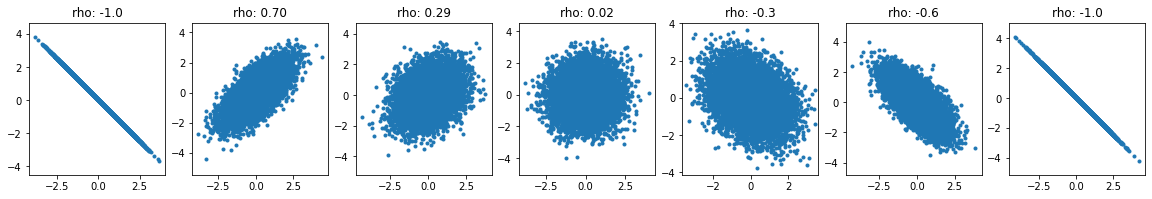

In [ ]:
plt.figure(figsize=(20,2.8))
for i, a in enumerate([-1,0.7,0.3,0.01,-0.3,-0.7,-1]):
    x,y = np.random.multivariate_normal([0, 0], [[1, a], [a, 1]], 10000).T
    plt.subplot(1,7,i+1)
    plt.axis('equal')
    plt.title(f'rho: {rho(x,y)}'[:9])
    plt.scatter(x,y, marker='.')

#### **예제 03. 표본 그리기 2**

아래 코드는 표본을 10000개 추출 합니다.



```
x, y = np.random.multivariate_normal([0, 0], [[1, 1], [1, 1]], 10000).T
x.shape, y.shape
```


1. x 표본은 그대로 두고, y 표본에 `1, 0.7, 0.3, 0.01, -0.3, -0.7, -1`을 각각 곱해서 각 표본쌍의 스캐터 플롯 7개를 그리세요.
2. 7가지 경우에 대한 x, y 상관계수를 구하세요.


[0.0001 0.0001 0.0001 ... 0.0001 0.0001 0.0001]
[0.0001 0.0001 0.0001 ... 0.0001 0.0001 0.0001]
[0.0001 0.0001 0.0001 ... 0.0001 0.0001 0.0001]
[0.0001 0.0001 0.0001 ... 0.0001 0.0001 0.0001]
[0.0001 0.0001 0.0001 ... 0.0001 0.0001 0.0001]
[0.0001 0.0001 0.0001 ... 0.0001 0.0001 0.0001]
[0.0001 0.0001 0.0001 ... 0.0001 0.0001 0.0001]
[0.0001 0.0001 0.0001 ... 0.0001 0.0001 0.0001]
[0.0001 0.0001 0.0001 ... 0.0001 0.0001 0.0001]
[0.0001 0.0001 0.0001 ... 0.0001 0.0001 0.0001]
[0.0001 0.0001 0.0001 ... 0.0001 0.0001 0.0001]
[0.0001 0.0001 0.0001 ... 0.0001 0.0001 0.0001]
[0.0001 0.0001 0.0001 ... 0.0001 0.0001 0.0001]
[0.0001 0.0001 0.0001 ... 0.0001 0.0001 0.0001]
[0.0001 0.0001 0.0001 ... 0.0001 0.0001 0.0001]
[0.0001 0.0001 0.0001 ... 0.0001 0.0001 0.0001]
[0.0001 0.0001 0.0001 ... 0.0001 0.0001 0.0001]
[0.0001 0.0001 0.0001 ... 0.0001 0.0001 0.0001]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: covariance is not positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


[0.0001 0.0001 0.0001 ... 0.0001 0.0001 0.0001]
[0.0001 0.0001 0.0001 ... 0.0001 0.0001 0.0001]
[0.0001 0.0001 0.0001 ... 0.0001 0.0001 0.0001]


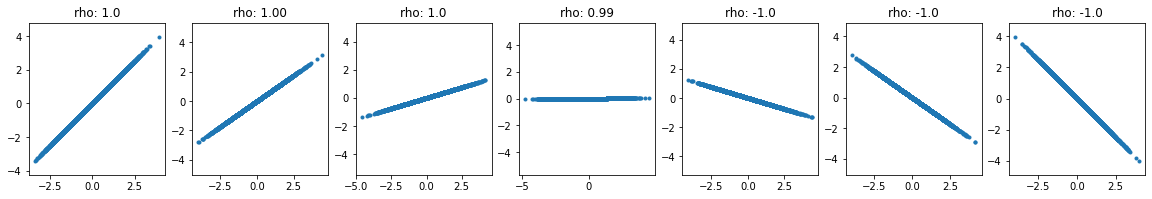

In [ ]:
plt.figure(figsize=(20,2.8))
for i, a in enumerate([1,0.7,0.3,0.01,-0.3,-0.7,-1]):
    x,y = np.random.multivariate_normal([0, 0], [[1, a], [1, a]], 10000).T
    plt.subplot(1,7,i+1)
    plt.axis('equal')
    plt.title(f'rho: {rho(x,y)}'[:9])
    plt.scatter(x,y, marker='.')